In [78]:
pip install pandas numpy matplotlib seaborn xgboost shap scikit-learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')


In [102]:
sentiment_df=pd.read_csv('/content/fear_greed_index.csv')
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [103]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [104]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
sentiment_df.set_index('date', inplace=True)

In [105]:
sentiment_df.columns

Index(['timestamp', 'value', 'classification'], dtype='object')

In [106]:
sentiment_df.drop('date', axis=1, inplace=True)

KeyError: "[' date'] not found in axis"

In [107]:
sentiment_df

,timestamp,value,classification
date,,,
2018-02-01,1517463000,30,Fear
2018-02-02,1517549400,15,Extreme Fear
2018-02-03,1517635800,40,Fear
2018-02-04,1517722200,24,Extreme Fear
2018-02-05,1517808600,11,Extreme Fear
...,...,...,...
2025-04-28,1745818200,54,Neutral
2025-04-29,1745904600,60,Greed
2025-04-30,1745991000,56,Greed


In [108]:
sentiment_df.head()

,timestamp,value,classification
date,,,
2018-02-01,1517463000,30,Fear
2018-02-02,1517549400,15,Extreme Fear
2018-02-03,1517635800,40,Fear
2018-02-04,1517722200,24,Extreme Fear
2018-02-05,1517808600,11,Extreme Fear


In [162]:
bitcoin_df=pd.read_csv('/content/historical_data.csv')
bitcoin_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [163]:
bitcoin_df.drop("Account",inplace=True,axis=1)
bitcoin_df.drop(['Transaction Hash','Trade ID','Order ID'],inplace=True,axis=1)

In [164]:
bitcoin_df.columns

Index(['Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Crossed',
       'Fee', 'Timestamp'],
      dtype='object')

In [165]:
bitcoin_df['Timestamp']=pd.to_datetime(bitcoin_df['Timestamp'],unit='ms')
bitcoin_df.set_index('Timestamp',inplace=True)

In [166]:
bitcoin_df.drop('Timestamp IST',axis=1,inplace=True)

In [167]:
bitcoin_df.head(100)

,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Crossed,Fee
Timestamp,,,,,,,,,,
2024-10-27 03:33:20,@107,7.9769,986.87,7872.16,BUY,0.000000,Buy,0.000000,True,0.345404
2024-10-27 03:33:20,@107,7.9800,16.00,127.68,BUY,986.524596,Buy,0.000000,True,0.005600
2024-10-27 03:33:20,@107,7.9855,144.09,1150.63,BUY,1002.518996,Buy,0.000000,True,0.050431
2024-10-27 03:33:20,@107,7.9874,142.98,1142.04,BUY,1146.558564,Buy,0.000000,True,0.050043
2024-10-27 03:33:20,@107,7.9894,8.73,69.75,BUY,1289.488521,Buy,0.000000,True,0.003055
...,...,...,...,...,...,...,...,...,...,...
2024-10-27 03:33:20,@107,9.0642,82.02,743.45,SELL,4189.888602,Sell,101.447367,True,0.260205
2024-10-27 03:33:20,@107,9.0642,97.70,885.57,SELL,4107.868602,Sell,120.841353,True,0.309950
2024-10-27 03:33:20,@107,9.0613,98.00,888.01,SELL,4010.168602,Sell,120.928211,True,0.310802


In [168]:
# Add a column for just the date (not time) in bitcoin_df
bitcoin_df["date_only"] = bitcoin_df.index.date

# Make sure the date index of sentiments_df is also just date
sentiment_df["date_only"] = sentiment_df.index.date

# Merge on the date_only column
merged_df = bitcoin_df.merge(sentiment_df[["date_only", "classification"]], on="date_only", how="left")



In [169]:
merged_df.dropna(inplace=True)

In [170]:
merged_df.set_index('date_only',inplace=True)

In [171]:
merged_df

,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Crossed,Fee,classification
date_only,,,,,,,,,,,
2024-10-27,@107,7.9769,986.87,7872.16,BUY,0.000000,Buy,0.000000,True,0.345404,Greed
2024-10-27,@107,7.9800,16.00,127.68,BUY,986.524596,Buy,0.000000,True,0.005600,Greed
2024-10-27,@107,7.9855,144.09,1150.63,BUY,1002.518996,Buy,0.000000,True,0.050431,Greed
2024-10-27,@107,7.9874,142.98,1142.04,BUY,1146.558564,Buy,0.000000,True,0.050043,Greed
2024-10-27,@107,7.9894,8.73,69.75,BUY,1289.488521,Buy,0.000000,True,0.003055,Greed
...,...,...,...,...,...,...,...,...,...,...,...
2025-02-19,SOL,133.6000,4.13,551.77,BUY,-1797.880000,Close Short,-82.883731,False,0.055176,Fear
2025-02-19,SOL,133.6000,7.50,1002.00,BUY,-1793.750000,Close Short,-150.515250,False,0.100200,Fear
2025-02-19,SOL,133.6000,3.93,525.05,BUY,-1786.250000,Close Short,-78.869991,False,0.052504,Fear


In [172]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2644 entries, 2018-02-01 to 2025-05-02
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date_only       2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 103.3+ KB


In [173]:
sentiment_df['classification'].value_counts()

,count
classification,
Fear,781
Greed,633
Extreme Fear,508
Neutral,396
Extreme Greed,326


In [174]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 211224 entries, 2024-10-27 03:33:20 to 2025-06-15 15:06:40
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Coin             211224 non-null  object 
 1   Execution Price  211224 non-null  float64
 2   Size Tokens      211224 non-null  float64
 3   Size USD         211224 non-null  float64
 4   Side             211224 non-null  object 
 5   Start Position   211224 non-null  float64
 6   Direction        211224 non-null  object 
 7   Closed PnL       211224 non-null  float64
 8   Crossed          211224 non-null  bool   
 9   Fee              211224 non-null  float64
 10  date_only        211224 non-null  object 
dtypes: bool(1), float64(6), object(4)
memory usage: 17.9+ MB


In [175]:
bitcoin_df["Coin"].value_counts()

,count
Coin,
HYPE,68005
@107,29992
BTC,26064
ETH,11158
SOL,10691
...,...
@18,1
@30,1
@25,1


In [176]:
bitcoin_df['Side'].value_counts()

,count
Side,
SELL,108528
BUY,102696


In [177]:
bitcoin_df['Direction'].value_counts()

,count
Direction,
Open Long,49895
Close Long,48678
Open Short,39741
Close Short,36013
Sell,19902
Buy,16716
Spot Dust Conversion,142
Short > Long,70
Long > Short,57


In [178]:
bitcoin_df.head(100)

,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Crossed,Fee,date_only
Timestamp,,,,,,,,,,,
2024-10-27 03:33:20,@107,7.9769,986.87,7872.16,BUY,0.000000,Buy,0.000000,True,0.345404,2024-10-27
2024-10-27 03:33:20,@107,7.9800,16.00,127.68,BUY,986.524596,Buy,0.000000,True,0.005600,2024-10-27
2024-10-27 03:33:20,@107,7.9855,144.09,1150.63,BUY,1002.518996,Buy,0.000000,True,0.050431,2024-10-27
2024-10-27 03:33:20,@107,7.9874,142.98,1142.04,BUY,1146.558564,Buy,0.000000,True,0.050043,2024-10-27
2024-10-27 03:33:20,@107,7.9894,8.73,69.75,BUY,1289.488521,Buy,0.000000,True,0.003055,2024-10-27
...,...,...,...,...,...,...,...,...,...,...,...
2024-10-27 03:33:20,@107,9.0642,82.02,743.45,SELL,4189.888602,Sell,101.447367,True,0.260205,2024-10-27
2024-10-27 03:33:20,@107,9.0642,97.70,885.57,SELL,4107.868602,Sell,120.841353,True,0.309950,2024-10-27
2024-10-27 03:33:20,@107,9.0613,98.00,888.01,SELL,4010.168602,Sell,120.928211,True,0.310802,2024-10-27


In [122]:
merged_df.to_csv('merged_bitcoin_trades_sentiment.csv')
print("Merged dataset saved as 'merged_bitcoin_trades_sentiment.csv'")

Merged dataset saved as 'merged_bitcoin_trades_sentiment.csv'


In [197]:
merged_df.head(100)

,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Crossed,Fee,classification
date_only,,,,,,,,,,,
2024-10-27,@107,7.9769,986.87,7872.16,BUY,0.000000,Buy,0.000000,True,0.345404,Greed
2024-10-27,@107,7.9800,16.00,127.68,BUY,986.524596,Buy,0.000000,True,0.005600,Greed
2024-10-27,@107,7.9855,144.09,1150.63,BUY,1002.518996,Buy,0.000000,True,0.050431,Greed
2024-10-27,@107,7.9874,142.98,1142.04,BUY,1146.558564,Buy,0.000000,True,0.050043,Greed
2024-10-27,@107,7.9894,8.73,69.75,BUY,1289.488521,Buy,0.000000,True,0.003055,Greed
...,...,...,...,...,...,...,...,...,...,...,...
2024-10-27,@107,9.0642,82.02,743.45,SELL,4189.888602,Sell,101.447367,True,0.260205,Greed
2024-10-27,@107,9.0642,97.70,885.57,SELL,4107.868602,Sell,120.841353,True,0.309950,Greed
2024-10-27,@107,9.0613,98.00,888.01,SELL,4010.168602,Sell,120.928211,True,0.310802,Greed


In [180]:
merged_df.shape

(184263, 11)

In [181]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184263 entries, 2024-10-27 to 2025-02-19
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Coin             184263 non-null  object 
 1   Execution Price  184263 non-null  float64
 2   Size Tokens      184263 non-null  float64
 3   Size USD         184263 non-null  float64
 4   Side             184263 non-null  object 
 5   Start Position   184263 non-null  float64
 6   Direction        184263 non-null  object 
 7   Closed PnL       184263 non-null  float64
 8   Crossed          184263 non-null  bool   
 9   Fee              184263 non-null  float64
 10  classification   184263 non-null  object 
dtypes: bool(1), float64(6), object(4)
memory usage: 15.6+ MB


In [182]:
merged_df['Side'].value_counts()

,count
Side,
SELL,95885
BUY,88378


In [183]:
merged_df['classification'].value_counts()

,count
classification,
Fear,133871
Greed,36289
Neutral,7141
Extreme Greed,6962


In [184]:
merged_df['Direction'].value_counts()

,count
Direction,
Open Long,45564
Close Long,44935
Open Short,32861
Close Short,28091
Sell,17890
Buy,14657
Spot Dust Conversion,137
Short > Long,65
Long > Short,54


In [187]:
merged_df

,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Crossed,Fee,classification
date_only,,,,,,,,,,,
2024-10-27,@107,7.9769,986.87,7872.16,BUY,0.000000,Buy,0.000000,True,0.345404,Greed
2024-10-27,@107,7.9800,16.00,127.68,BUY,986.524596,Buy,0.000000,True,0.005600,Greed
2024-10-27,@107,7.9855,144.09,1150.63,BUY,1002.518996,Buy,0.000000,True,0.050431,Greed
2024-10-27,@107,7.9874,142.98,1142.04,BUY,1146.558564,Buy,0.000000,True,0.050043,Greed
2024-10-27,@107,7.9894,8.73,69.75,BUY,1289.488521,Buy,0.000000,True,0.003055,Greed
...,...,...,...,...,...,...,...,...,...,...,...
2025-02-19,SOL,133.6000,4.13,551.77,BUY,-1797.880000,Close Short,-82.883731,False,0.055176,Fear
2025-02-19,SOL,133.6000,7.50,1002.00,BUY,-1793.750000,Close Short,-150.515250,False,0.100200,Fear
2025-02-19,SOL,133.6000,3.93,525.05,BUY,-1786.250000,Close Short,-78.869991,False,0.052504,Fear


In [192]:
def perform_crypto_eda(df):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd

    print("\n🔢 Basic Info:")
    print(df.info())
    print("\n📊 Summary Statistics:")
    print(df.describe())

    print("\n📈 Trade Count by Side:")
    print(df['Side'].value_counts())

    print("\n📉 Sentiment Classification Distribution:")
    print(df['classification'].value_counts())

    print("\n🔁 Direction Distribution:")
    print(df['Direction'].value_counts())

    # Plotting Trade Count by Sentiment
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x='classification', order=df['classification'].value_counts().index, palette='viridis')
    plt.title("Sentiment Classification Count")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plotting BUY/SELL Count
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x='Side', palette='coolwarm')
    plt.title("Buy vs Sell Count")
    plt.ylabel("Count")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # If 'date_only' is already the index
    daily_trades = df.groupby([df.index, 'Side']).size().unstack().fillna(0)

    # Plot
    daily_trades.plot(kind='line', figsize=(10, 5), title="Daily Trade Volume (BUY vs SELL)")
    plt.ylabel("Number of Trades")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Volume and PnL by Sentiment
    sentiment_stats = df.groupby('classification').agg({
        'Size USD': ['sum', 'mean'],
        'Closed PnL': ['sum', 'mean'],
        'Fee': 'sum'
    }).round(2)

    print("\n📊 Aggregate Stats by Classification (Sentiment):")
    print(sentiment_stats)

    # Correlation Heatmap for numeric features
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    plt.figure(figsize=(10, 6))
    sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
    plt.title("Correlation Heatmap of Numeric Features")
    plt.tight_layout()
    plt.show()
    return {
        'side_counts': df['Side'].value_counts(),
        'classification_counts': df['classification'].value_counts(),
        'direction_counts': df['Direction'].value_counts(),
        'sentiment_stats': sentiment_stats
    }



🔢 Basic Info:
<class 'pandas.core.frame.DataFrame'>
Index: 184263 entries, 2024-10-27 to 2025-02-19
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Coin             184263 non-null  object 
 1   Execution Price  184263 non-null  float64
 2   Size Tokens      184263 non-null  float64
 3   Size USD         184263 non-null  float64
 4   Side             184263 non-null  object 
 5   Start Position   184263 non-null  float64
 6   Direction        184263 non-null  object 
 7   Closed PnL       184263 non-null  float64
 8   Crossed          184263 non-null  bool   
 9   Fee              184263 non-null  float64
 10  classification   184263 non-null  object 
dtypes: bool(1), float64(6), object(4)
memory usage: 19.7+ MB
None

📊 Summary Statistics:
       Execution Price   Size Tokens      Size USD  Start Position  \
count    184263.000000  1.842630e+05  1.842630e+05    1.842630e+05   
mean       9624.179560  4

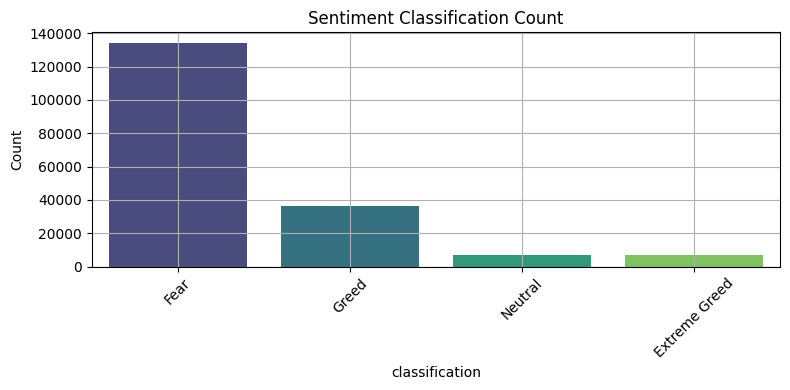

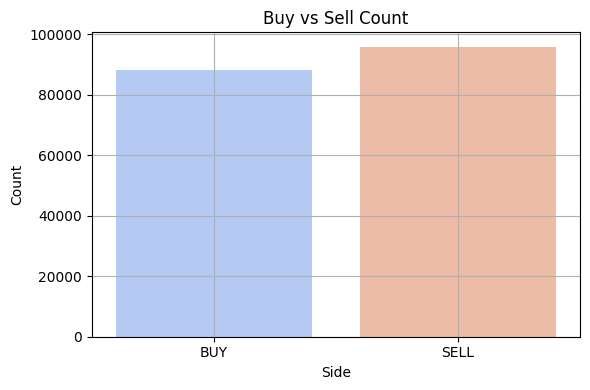

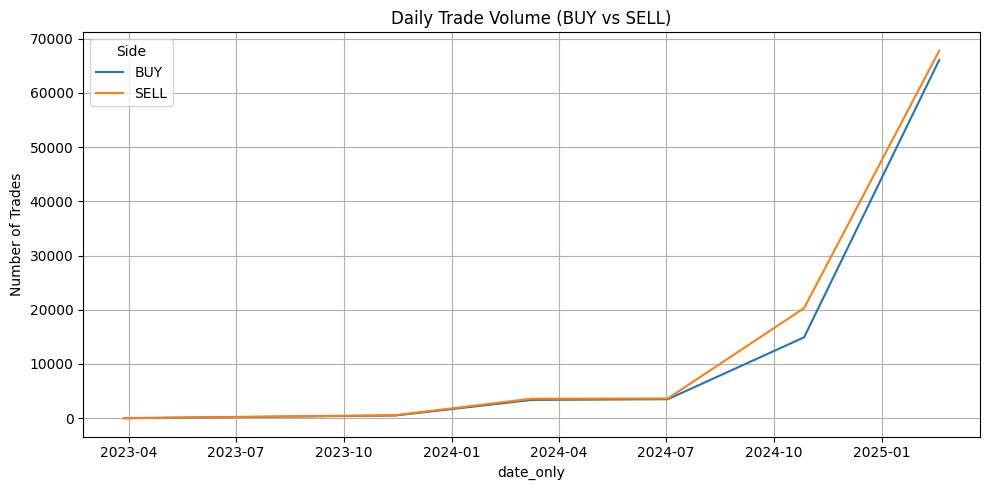


📊 Aggregate Stats by Classification (Sentiment):
                    Size USD           Closed PnL               Fee
                         sum     mean         sum   mean        sum
classification                                                     
Extreme Greed   3.940677e+07  5660.27   176965.49  25.42    6812.78
Fear            7.041585e+08  5259.98  6699925.19  50.05  145018.04
Greed           1.155037e+08  3182.88  3189616.54  87.89   24334.03
Neutral         2.184323e+07  3058.85   158742.38  22.23    8743.88


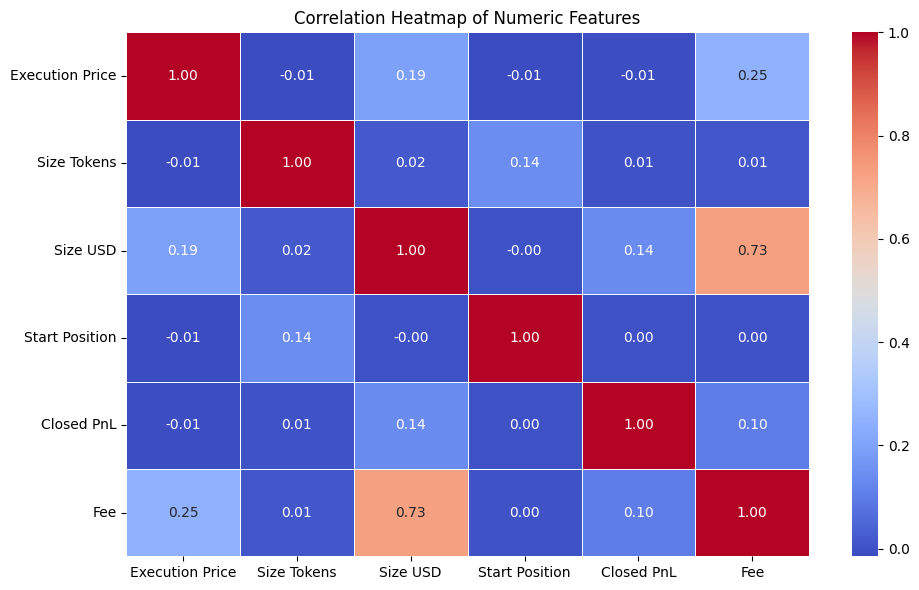

{'side_counts': Side
 SELL    95885
 BUY     88378
 Name: count, dtype: int64,
 'classification_counts': classification
 Fear             133871
 Greed             36289
 Neutral            7141
 Extreme Greed      6962
 Name: count, dtype: int64,
 'direction_counts': Direction
 Open Long               45564
 Close Long              44935
 Open Short              32861
 Close Short             28091
 Sell                    17890
 Buy                     14657
 Spot Dust Conversion      137
 Short > Long               65
 Long > Short               54
 Auto-Deleveraging           8
 Settlement                  1
 Name: count, dtype: int64,
 'sentiment_stats':                     Size USD           Closed PnL               Fee
                          sum     mean         sum   mean        sum
 classification                                                     
 Extreme Greed   3.940677e+07  5660.27   176965.49  25.42    6812.78
 Fear            7.041585e+08  5259.98  6699925.19  50.05

In [194]:
eda_result = perform_crypto_eda(merged_df)
eda_result


# 📆 1. Time-Series Sentiment vs. Performance Correlation
# 👉Goal : Analyze how trader PnL and trade volume change with daily sentiment over time.

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_sentiment_pnl_correlation(df):
    # Reset index to use 'date_only' as a column and rename it to 'Date'
    df = df.reset_index().rename(columns={'date_only': 'Date'})
    # Convert 'Date' to datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Aggregate data daily
    daily = df.groupby(['Date', 'classification']).agg({
        'Closed PnL': 'sum', # Use 'Closed PnL' from merged_df
        'Size USD': 'sum', # Use 'Size USD' from merged_df
        'Execution Price': 'mean' # Use 'Execution Price' from merged_df
    }).reset_index()

    # Pivot sentiment
    pivot_pnl = daily.pivot(index='Date', columns='classification', values='Closed PnL').fillna(0)
    pivot_volume = daily.pivot(index='Date', columns='classification', values='Size USD').fillna(0)

    # Plot PnL
    pivot_pnl.plot(kind='bar', stacked=True, figsize=(14, 5), title="📈 Daily PnL by Sentiment")
    plt.ylabel("Total PnL ($)")
    plt.tight_layout()
    plt.show()

    # Plot Volume
    pivot_volume.plot(kind='bar', stacked=True, figsize=(14, 5), title="📊 Daily Trade Volume by Sentiment")
    plt.ylabel("Total Size (USD)") # Changed label to reflect USD
    plt.tight_layout()
    plt.show()

    return pivot_pnl, pivot_volume

#2. PnL per Month + Volatility Analysis
# 👉 Goal:Understand monthly profitability, detect volatility patterns in execution prices.

In [142]:
import pandas as pd
import matplotlib.pyplot as plt

def monthly_pnl_volatility(df):
    # Reset index to use 'date_only' as a column and rename it to 'Date'
    df = df.reset_index().rename(columns={'date_only': 'Date'})
    df['Date'] = pd.to_datetime(df['Date'])
    df['Month'] = df['Date'].dt.to_period('M')

    # Use 'Closed PnL' and 'Execution Price' from merged_df
    monthly_pnl = df.groupby('Month')['Closed PnL'].sum()
    monthly_vol = df.groupby('Month')['Execution Price'].std()

    fig, ax1 = plt.subplots(figsize=(12, 5))

    # PnL
    ax1.set_title("📅 Monthly PnL and Execution Price Volatility")
    ax1.plot(monthly_pnl.index.astype(str), monthly_pnl.values, label='PnL', color='green')
    ax1.set_ylabel("PnL ($)", color='green')

    # Volatility
    ax2 = ax1.twinx()
    ax2.plot(monthly_vol.index.astype(str), monthly_vol.values, label='Volatility', color='red')
    ax2.set_ylabel("Price Volatility", color='red')

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return monthly_pnl, monthly_vol

# 🤖 3. Backtesting a Sentiment-Based Strategy
# ✅ Strategy Rule (Simple Example):
#Buy when sentiment is Extreme Fear or Fear

#Sell when sentiment is Greed or Extreme Greed

#Track cumulative realized PnL of this behavior

In [143]:
import pandas as pd
import matplotlib.pyplot as plt

def backtest_sentiment_strategy(df):
    # Reset index to use 'date_only' as a column and rename it to 'Date'
    df = df.reset_index().rename(columns={'date_only': 'Date'})
    df['Date'] = pd.to_datetime(df['Date'])

    # Define labels - ensure the mapping keys match the actual classifications
    df['signal'] = df['classification'].map({
        'Extreme Fear': 1,
        'Fear': 1,
        'Neutral': 0,
        'Greed': -1,
        'Extreme Greed': -1
    })

    # Use 'Closed PnL' from merged_df
    df['strategy_return'] = df['signal'] * df['Closed PnL']

    # Aggregate daily
    df_daily = df.groupby('Date')['strategy_return'].sum().cumsum()

    # Plot equity curve
    plt.figure(figsize=(12, 4))
    plt.plot(df_daily, color='blue')
    plt.title("📈 Strategy Equity Curve (Sentiment-Based)")
    plt.ylabel("Cumulative Strategy PnL ($)")
    plt.xlabel("Date")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return df_daily

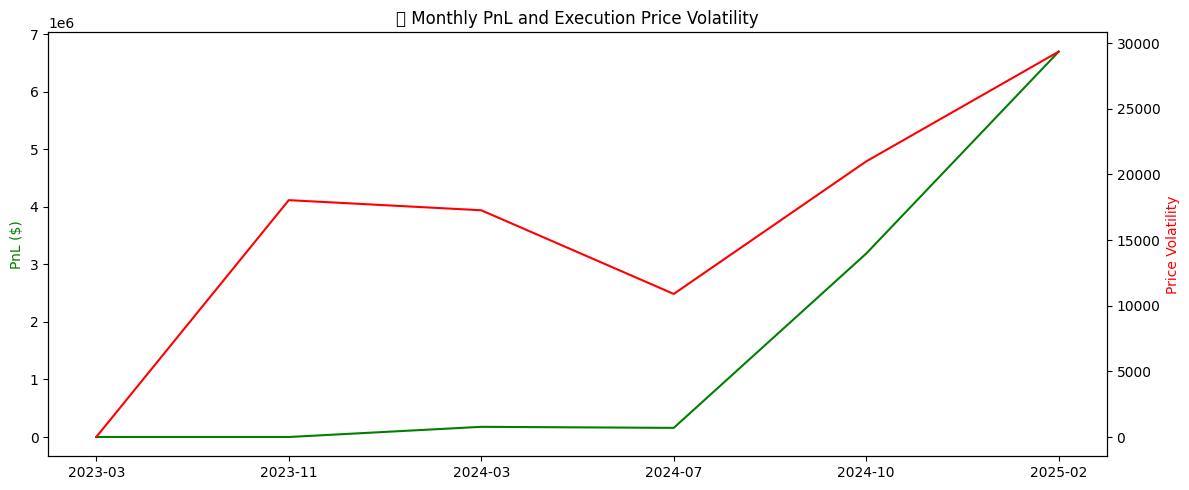

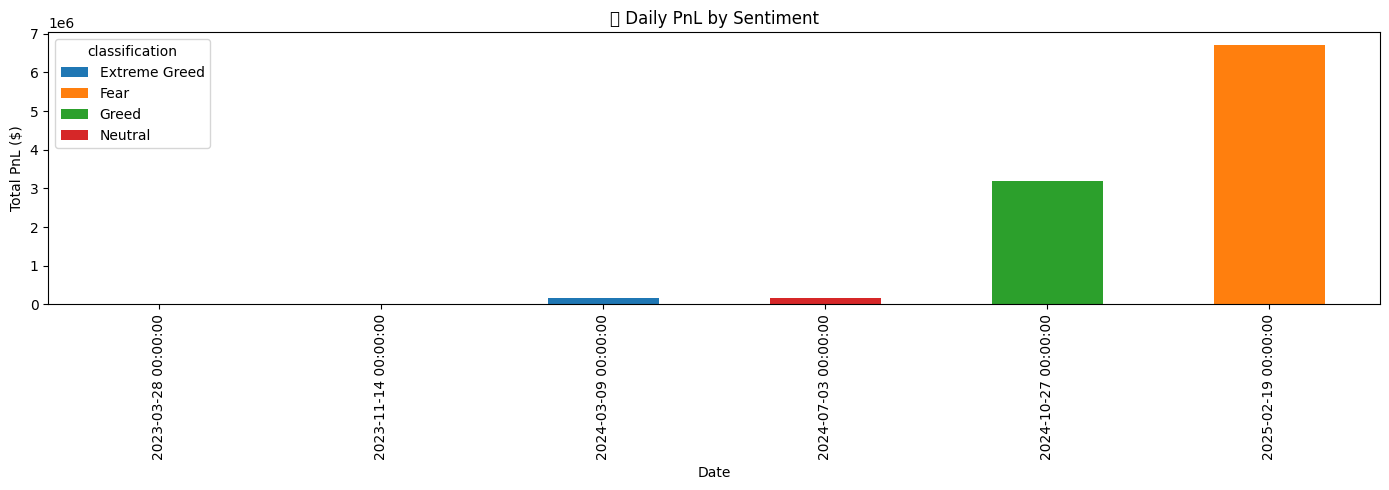

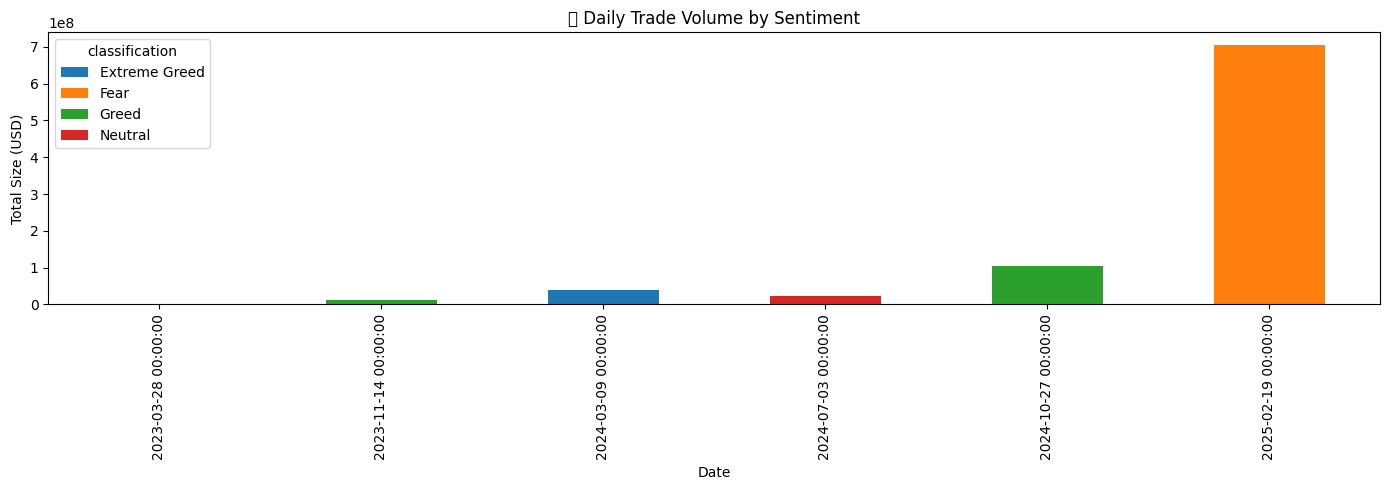

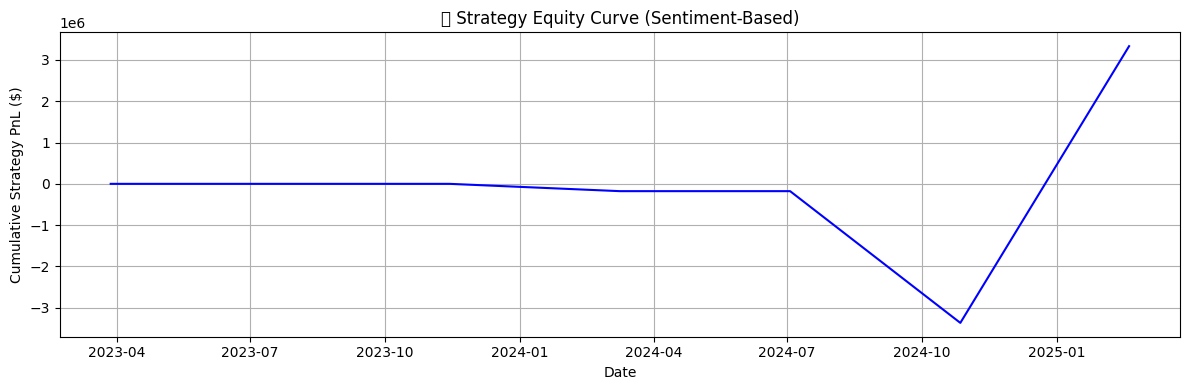

In [144]:
pnl, vol = monthly_pnl_volatility(merged_df)
pivot_pnl, pivot_volume = plot_sentiment_pnl_correlation(merged_df)
equity = backtest_sentiment_strategy(merged_df)


In [145]:
import numpy as np
import pandas as pd

# Ensure datetime index
merged_df.index = pd.to_datetime(merged_df.index)

# Daily PnL by sentiment
daily_pnl_sentiment = merged_df.groupby([merged_df.index, 'classification'])['Closed PnL'].sum().unstack().fillna(0)

# Sharpe Ratio: (mean return / std return)
sharpe_ratios = daily_pnl_sentiment.mean() / daily_pnl_sentiment.std()
print("📊 Sharpe Ratio per sentiment:\n", sharpe_ratios)

# Max Drawdown calculation
def max_drawdown(pnl_series):
    cumulative = pnl_series.cumsum()
    peak = cumulative.cummax()
    drawdown = cumulative - peak
    return drawdown.min()

drawdowns = daily_pnl_sentiment.apply(max_drawdown)
print("\n📉 Max Drawdown per sentiment:\n", drawdowns)


📊 Sharpe Ratio per sentiment:
 classification
Extreme Greed    0.408248
Fear             0.408248
Greed            0.408272
Neutral          0.408248
dtype: float64

📉 Max Drawdown per sentiment:
 classification
Extreme Greed    0.0
Fear             0.0
Greed            0.0
Neutral          0.0
dtype: float64


<Figure size 1000x600 with 0 Axes>

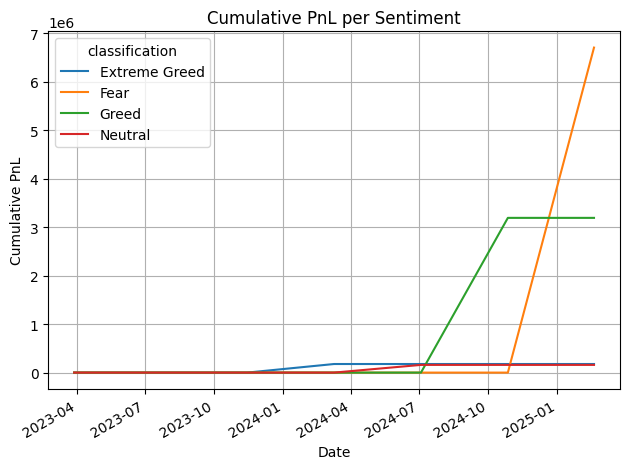

In [146]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
daily_pnl_sentiment.cumsum().plot()
plt.title("Cumulative PnL per Sentiment")
plt.xlabel("Date")
plt.ylabel("Cumulative PnL")
plt.grid(True)
plt.tight_layout()
plt.show()


In [158]:
merged_df.head(50)

,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Crossed,Fee,classification
date_only,,,,,,,,,,,
2024-10-27,@107,7.9769,986.87,7872.16,BUY,0.000000,Buy,0.000000,True,0.345404,Greed
2024-10-27,@107,7.9800,16.00,127.68,BUY,986.524596,Buy,0.000000,True,0.005600,Greed
2024-10-27,@107,7.9855,144.09,1150.63,BUY,1002.518996,Buy,0.000000,True,0.050431,Greed
2024-10-27,@107,7.9874,142.98,1142.04,BUY,1146.558564,Buy,0.000000,True,0.050043,Greed
2024-10-27,@107,7.9894,8.73,69.75,BUY,1289.488521,Buy,0.000000,True,0.003055,Greed
2024-10-27,@107,7.9900,1.41,11.27,BUY,1298.215466,Buy,0.000000,True,0.000493,Greed
2024-10-27,@107,7.9934,144.09,1151.77,BUY,1299.624972,Buy,0.000000,True,0.050431,Greed
2024-10-27,@107,8.0000,34.00,272.00,BUY,1443.664541,Buy,0.000000,True,0.011900,Greed
2024-10-27,@107,8.0000,46.00,368.00,BUY,1477.652641,Buy,0.000000,True,0.016100,Greed


In [148]:
# Daily total PnL
daily_df = merged_df.groupby(merged_df.index).agg({
    'Closed PnL': 'sum',
    'Fee': 'sum'
})

# Add Greed Score (e.g. count of greed entries per day)
daily_df['Greed_Count'] = merged_df[merged_df['classification'] == 'Greed'].groupby(merged_df[merged_df['classification'] == 'Greed'].index).size()
daily_df['Greed_Count'] = daily_df['Greed_Count'].fillna(0)

# Lagged features
for i in range(1, 4):
    daily_df[f'PnL_lag_{i}'] = daily_df['Closed PnL'].shift(i)

daily_df = daily_df.dropna()

In [149]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = daily_df.drop(['Closed PnL'], axis=1)
y = daily_df['Closed PnL']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
preds = xgb_model.predict(X_test)

print("XGBoost MSE:", mean_squared_error(y_test, preds))


XGBoost MSE: 12323364098999.215


In [152]:
X

,Fee,Greed_Count,PnL_lag_1,PnL_lag_2,PnL_lag_3
date_only,,,,,
2024-07-03,8743.877486,0.0,1.769655e+05,155.503357,0.000000
2024-10-27,21539.462735,35241.0,1.587424e+05,176965.491774,155.503357
2025-02-19,145018.043618,0.0,3.189461e+06,158742.378078,176965.491774


In [151]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np

# Scale
scaler = MinMaxScaler()
scaled = scaler.fit_transform(daily_df)

# Create sequences
X_lstm = []
y_lstm = []
window = 1 # Reduced window size for demonstration with limited data
for i in range(window, len(scaled)):
    X_lstm.append(scaled[i-window:i, :])
    y_lstm.append(scaled[i, 0])  # PnL column is at index 0

X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

# Train/test split
# Ensure there are enough samples for both train and test sets
if len(X_lstm) > 1:
    split = int(0.8 * len(X_lstm))
    # Ensure split is at least 1 for training data
    if split == 0:
        split = 1
    X_train_lstm, X_test_lstm = X_lstm[:split], X_lstm[split:]
    y_train_lstm, y_test_lstm = y_lstm[:split], y_lstm[split:]

    # Build LSTM
    model = Sequential([
        LSTM(64, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train_lstm, y_train_lstm, epochs=20, batch_size=1, verbose=0) # Reduced batch size

    lstm_preds = model.predict(X_test_lstm)
    print("LSTM MSE:", mean_squared_error(y_test_lstm, lstm_preds))
else:
    print("Not enough data to create sequences and train the LSTM model with the current window size.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
LSTM MSE: 0.7990650947585086
